In [ ]:
import pandas as pd
import re
import tqdm

In [ ]:
!pip install deep_translator
!pip install langid
import langid
from deep_translator import GoogleTranslator
!pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
!pip install pymorphy2
import pymorphy2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from typing import Dict
from matplotlib import pyplot
import seaborn as sns

In [ ]:
!gdown --id 15_FfenvHFoJVcPu6gGx9osLn71uDJ-Et

Downloading...
From: https://drive.google.com/uc?id=15_FfenvHFoJVcPu6gGx9osLn71uDJ-Et
To: /content/vacancies.csv
100% 1.05G/1.05G [00:24<00:00, 42.9MB/s]


In [ ]:
df = pd.read_csv("vacancies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Парсер навыков из вакансий с [гитхаба](https://github.com/keshavbansal015/Job-Description-Parser)

P.S. другие парсеры (в основном платные и для CV):


1.   https://www.maprecruit.ai/parsers - 30 файлов потестила в демо
2.   https://docs.microsoft.com/en-us/connectors/candidatezip/#parse-jd-via-file-content - не смогла зарегистирироваться
3.   http://www.reshufl.com/demo/ - потестила демо



In [ ]:
!gdown --id 179NC9uvqIbyahO1R3yyiYHV2srB38-5-

Downloading...
From: https://drive.google.com/uc?id=179NC9uvqIbyahO1R3yyiYHV2srB38-5-
To: /content/Resume_JD parser(spaCy).zip
100% 205M/205M [00:01<00:00, 113MB/s]


In [ ]:
import zipfile
zf = zipfile.ZipFile("parser.zip")
zf.extractall()

In [ ]:
# !pip install spacy
import spacy
sys.path.append(os.path.abspath('./Resume_JD parser(spaCy)/src'))

from func import *
from constants import *
from init_parser import init_parser_func
from tqdm import tqdm
sys.path.append(os.path.abspath('..'))

nlp = spacy.load('en_core_web_sm')

if __name__ == '__main__':)
	matcher = init_parser_func(nlp, './Resume_JD parser(spaCy)/input/Skillset.xlsx', file_type="excel")
	
	final_database = pd.DataFrame()	

	for each in tqdm(range(len(df))):

		text = df.loc[each, 'description']
		application_subject = df.loc[each,'id']
		data = create_profile(nlp,matcher,text,application_subject)
		final_database = final_database.append(data)

	# Saving the database
	final_database.to_csv('./Resume_JD parser(spaCy)/input/Data.csv', index=False)

/content
Success!


100%|██████████| 164916/164916 [2:08:26<00:00, 21.40it/s]


In [ ]:
final_database

,Company/Candidate Name,Skill,Sub-skill,Count
0,47319343,Coding,SQL,1
0,47472541,Analytics,Excel,1
0,46134407,Business,MS Office,1
0,47513275,Business,MS Office,1
0,47727709,Coding,JavaScript,1
...,...,...,...,...
0,46120872,Analytics,Excel,1
0,47121032,Business,MS Office,1
0,47187542,DevOps,MS Word,1
1,47187542,Analytics,Excel,1


# Парсер описания вакансий с помощью регулярных выражений

In [ ]:
lang, lang_list = {}, []
def lang_variety(x):
  language = langid.classify(x)[0]
  lang_list.append(language)
  if language in lang:
    lang[language] += 1
  else:
    lang[language] = 1
df['description'].apply(lambda x: lang_variety(x));

In [ ]:
df['language'] = pd.DataFrame(lang_list)

In [ ]:
df.to_csv('dataframe.csv', index=False)

In [ ]:
from deep_translator import GoogleTranslator, MicrosoftTranslator, YandexTranslator, MyMemoryTranslator, LingueeTranslator, PonsTranslator

In [ ]:
iteration = 0
import time
def translate(text: str):
  global iteration
  # print((text))
  # try:
  text_ready = ''
  # for sentence in text.split('.'):
  #   (text_ready+'.').join(MyMemoryTranslator(source='auto', target='ru').translate(sentence))
  text = GoogleTranslator(source='auto', target='ru').translate(text)
  time.sleep(1)
  # text_right = MyMemoryTranslator(source='auto', target='ru').translate(text[int(len(text)/2):])
  # except:
    # print('\n', iteration, 'ВСЁ', text, '\n')
  if iteration % 100 == 0:
    print(iteration, text, '\n')
  iteration += 1
  return text

In [ ]:
df_ = pd.read_csv("vacancies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_['description'][df_['language'] != 'ru'] = df_['description'][df_['language'] != 'ru'].apply(lambda x: translate(x))

In [ ]:
def plot_dict(d: Dict):
  """
  Создаём метод, который строит гистограмму для словаря
  Аргумент:
  d - словарь, который нужно изобразить на гистограмме
  """
  d = dict(sorted(d.items(), key=lambda item: -item[1]))
  keys = list(d.keys())
  vals = [100*d[k]/len(df) for k in keys]
  sns.barplot(x=keys, y=vals, color='green')
  pyplot.xticks(rotation=45, ha="right");

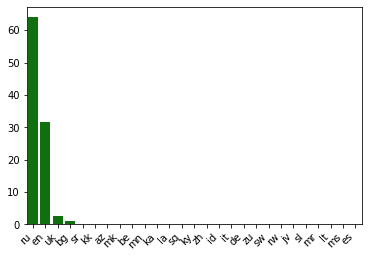

In [ ]:
# Строим распределение вакансий по языкам, на которых написано описание вакансии
plot_dict(lang)

In [ ]:
# Переводим описания вакансий не на русском
translator = Translator()
df['description'][df['language'] != 'ru'] = df['description'].apply(lambda x: translator.translate(x, dest='ru').text)

In [ ]:
def jd(x: str, regular_try: str, regular_except: str, regular_except_try: str, result: list, result_: list):
  """
  Создаём метод, который ищет по заданному регулярному выражению в строке
  Аргументы:
  x - строка в датафрейме с описанием вакансий
  regular_try, regular_except, regular_except_try - регулярные выражения, согласно которым работает парсер
  result - список, куда записывается результат работы метода
  result_ - список (для столбца description), из которого удаляются регулярные выражения
  """
  x = MyMemoryTranslator(source='auto', target='ru').translate(x)
  try:
    result.append(re.search(regular_try, x).group(0))
    result_.append(re.sub(regular_try, '', x))
  except:
    try:
      result.append(re.search(regular_except, x).group(0))
      result_.append(re.sub(regular_except, '', x))
    except:
      try:
        result.append(re.search(regular_except_try, x).group(0))
        result_.append(re.sub(regular_except_try, '', x))
      except:
        result.append(re.search(regular_except, x))
        result_.append(re.sub(regular_except, '', x))

In [ ]:
def jd_new_column(regular_try: str, regular_except: str, regular_except_try: str, new_column: str, df: pd.DataFrame):
  """
  Создаём метод, который создаёт новый столбец после парсинга
  Аргументы:
  regular_try, regular_except, regular_except_try - регулярные выражения, согласно которым работает парсер
  new_column - название столбца, который создаётся
  df - датафрейм, который содержит описание вакансий
  """
  result, result_ = [], []
  df['description'].apply(lambda x: jd(x, regular_try, regular_except, regular_except_try, result, result_));
  df[f'description_{new_column}'] = pd.DataFrame(result)[0]
  df['description'] = pd.DataFrame(result_)

In [ ]:
jd_new_column(r'(?i)обязанности:.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|чем предстоит заниматься.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|(задачи|задачах):.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|ищем.{1,25}которые\s{1,}будут.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|что нужно делать.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))', 
              r'(?i)обязанности.*?(\.|требования|требование|условия|предлагаем)|чем предстоит заниматься.*?(\.|требования|требование|условия|предлагаем)|(задачи|задачах).*?(\.|требования|требование|условия|предлагаем)|ищем.{1,15}которые\s{1,}будут.*?(\.|требования|требование|условия|предлагаем)|что нужно делать.*?(\.|требования|требование|условия|предлагаем)',
              r'(?i)обязанности.+|чем предстоит заниматься.+|(задачи|задачах).+|ищем.{1,15}которые\s{1,}будут.+|что нужно делать.+',
                       'responsibilities', df);

NotValidLength: ignored

In [ ]:
jd_new_column(r'(?i)(требования|требование):.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|условия|предлагаем))', 
              r'(?i)(требования|требование).*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|условия|предлагаем)',
              r'(?i)(требования|требование).+',
                       'requirements', df);

In [ ]:
jd_new_column(r'(?i)условия:.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования))|предлагаем.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования))', 
              r'(?i)условия.*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования)|предлагаем.*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования)',
              r'(?i)условия.+|предлагаем.+',
                       'conditions', df);

In [ ]:
# Убираем из столбцов слова, по которым выделялись столбцы
df['description_responsibilities'] = df['description_responsibilities'].apply(lambda x: re.sub(r'(?i)(обязанности:|обязанности|чем предстоит заниматься|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать)', '', str(x)))
df['description_requirements'] = df['description_requirements'].apply(lambda x: re.sub(r'(?i)(требования|требование)', '', str(x)))
df['description_conditions'] = df['description_conditions'].apply(lambda x: re.sub(r'(?i)(условия|предлагаем)', '', str(x)))

In [ ]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].head()

,description_responsibilities,description_requirements,description_conditions,description
0,</strong></p> <ul> <li>Организация и проведени...,:</strong></p> <ul> <li>Опыт работы в должност...,:</strong></p> <ul> <li>Официальное трудоустро...,<p><em><strong>Агропромышленный холдинг «МИРАТ...
1,"</strong><br />Доставлять банковские продукты,...",None,"</strong></p> <ul> <li>2/2 или 5/2. Дни, свобо...",<p>Тинькофф - первый онлайн банк в России. С 2...
2,</strong></p> <ul> <li>Сварка кузовов и рам те...,:</strong> <ul> <li>Опыт работы от 3х лет</li>...,:</strong> <ul> <li>Трудоустройство согласно Т...,<p>В Московскую область для работы вахтовым ме...
3,<br />- Контроль и координация работы отдела;<...,:<br />- Опыт работы в продажах приветствуется...,":<br />- Оплата без задержек, премии, бонусы;<...","<p><br />- Работа в молодом, дружном коллектив..."
4,</strong> <ul> <li>ведение первичного учета</l...,:</strong> <ul> <li>высшее образование</li> <l...,:</strong> <ul> <li>5 дневный рабочий день</li...,<strong></ul> <strong></ul> <strong></ul>


In [ ]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].describe()

,description_responsibilities,description_requirements,description_conditions,description
count,164916,164916,164916,164916
unique,104600,93793,101745,89042
top,None,None,None,<strong></ul> <strong></ul> <strong></ul>
freq,26498,41341,23392,27856


In [ ]:
# def plot_dict(d: Dict, i: int, title: str):
#   """
#   Создаём метод, который строит гистограмму для словаря
#   Аргумент:
#   d - словарь, который нужно изобразить на гистограмме
#   i - номер строки в графике
#   j - номер столбца в графике
#   title - название графика
#   """
#   keys = [x.strip() for x in list(d.keys())]
#   vals = [(d[k]) for k in keys]
#   sns.barplot(x=keys, y=vals, color='green', ax = ax[i])
#   ax[i].set_title(title)
#   ax[i].tick_params(labelrotation=45)

In [ ]:
# Считаем наиболее часто встречающиеся слова в описании вакансий, за исключением stopwords и небуквенных символов
stopwords = nltk.corpus.stopwords.words('russian')
symbols = ['<', '>', '...', ',', '-', '.', ';', ':', '«', '»', '!', '(', ')', '/', '–', '—', '&', 'li', '/li', 'strong', '/strong','p', '/p','ul', '/ul','quot', 'em', 'br', 'none', '•']
morph = pymorphy2.MorphAnalyzer()
def mostcommon(col: str, words: int) -> Dict:
  """
  Создаём метод, который создаёт словарь из самых часто встречающихся слов в столбце
  Аргументы:
  col - название столбца, из которого берём слова
  words - количество самых часто встречающихся слов
  Возвращает:
  most - словарь из самых часто встречающихся слов в столбце
  """
  s = df[col].to_string()
  allWords = nltk.tokenize.word_tokenize(s)
  allWordExceptStopDist = nltk.FreqDist(morph.parse(w.lower())[0].normal_form for w in allWords if w.lower() not in symbols and w.lower() not in stopwords)
  most = dict(Counter(allWordExceptStopDist).most_common(words))
  return most

In [ ]:
description = mostcommon('description', 20)
description_responsibilities = mostcommon('description_responsibilities', 20)
description_requirements = mostcommon('description_requirements', 20)
description_conditions = mostcommon('description_conditions', 20)

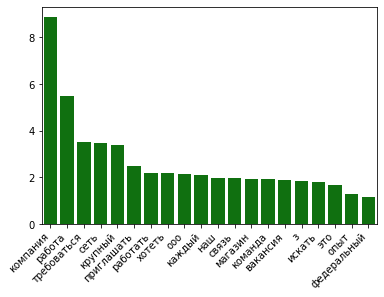

In [ ]:
# Строим распределения по словам (нормировка на количество вакансий всего)
plot_dict(description)

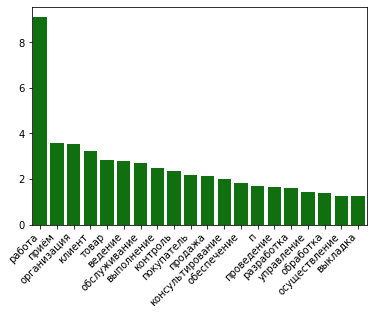

In [ ]:
plot_dict(description_responsibilities)

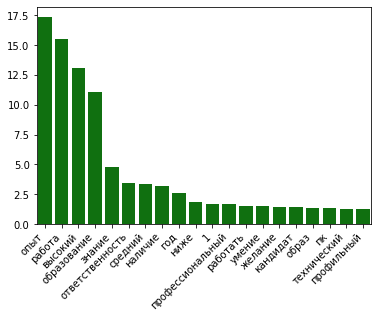

In [ ]:
plot_dict(description_requirements)

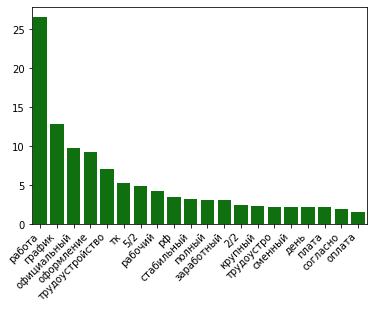

In [ ]:
plot_dict(description_conditions)

In [ ]:
# fig, ax = pyplot.subplots(nrows=4, ncols=1, figsize = (5, 30))
# plot_dict(description, 0, 'description')
# plot_dict(description_responsibilities, 1, 'description_responsibilities')
# plot_dict(description_requirements, 2, 'description_requirements')
# plot_dict(description_conditions, 3, 'description_conditions')

In [ ]:
# Разделяем столбец из строк на столбец из списков
df['description_responsibilities'] = df['description_responsibilities'].apply(lambda x: re.split('<li>', str(x)))
df['description_requirements'] = df['description_requirements'].apply(lambda x: re.split('<li>', str(x)))
df['description_conditions'] = df['description_conditions'].apply(lambda x: re.split('<li>', str(x)))

In [ ]:
def delete_code(x: list) -> list:
  """
  Создаём метод, который сначала удаляет код из каждого элемента списка, а далее удаляет элементы, состоящие только из символов
  Аргумент:
  x - список с набором обязанностей/требований и т.д.
  Возвращает:
  x - очищенный от кода список
  """
  x = [re.sub('(<.*?>|&quot)', '', el) for el in x]
  for el in x:
    if re.match(r"^[! #$%&()*+,.\/:;<=>?@[\]^_`{|}~—\"\-]*$", el) is not None or el == 'None':
      x.remove(el)
  return x

In [ ]:
df['description_responsibilities'] = df['description_responsibilities'].apply(delete_code)
df['description_requirements'] = df['description_requirements'].apply(delete_code)
df['description_conditions'] = df['description_conditions'].apply(delete_code)

In [ ]:
df['len_description_responsibilities'] = df['description_responsibilities'].apply(len)
df['len_description_requirements'] = df['description_requirements'].apply(len)
df['len_description_conditions'] = df['description_conditions'].apply(len)

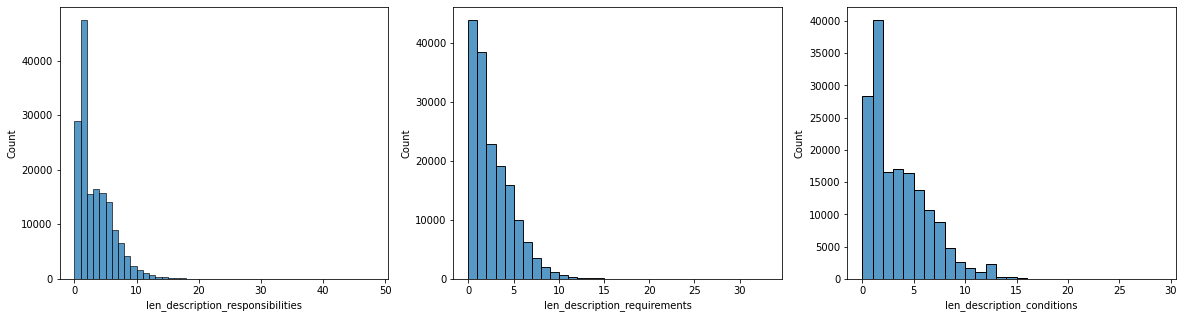

In [ ]:
# Строим распределения вакансий по количеству обязанностей, требований, условий
fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.histplot(df['len_description_responsibilities'], binwidth = 1, ax=ax[0])
sns.histplot(df['len_description_requirements'], binwidth = 1, ax=ax[1])
sns.histplot(df['len_description_conditions'], binwidth = 1, ax=ax[2])

In [ ]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].head()

,description_responsibilities,description_requirements,description_conditions,description
0,[Организация и проведение медицинских осмотров...,"[Опыт работы в должности приветствуется; , Нал...",[Официальное трудоустройство (оплата больничны...,<p><em><strong>Агропромышленный холдинг «МИРАТ...
1,"[Доставлять банковские продукты, подписывать д...",[],"[2/2 или 5/2. Дни, свободные от выполнения раб...",<p>Тинькофф - первый онлайн банк в России. С 2...
2,"[Сварка кузовов и рам тележек вагонов метро , ...","[Опыт работы от 3х лет , Наличие подтверждения...","[Трудоустройство согласно ТК РФ , Суточные с п...",<p>В Московскую область для работы вахтовым ме...
3,[- Контроль и координация работы отдела;- Выпо...,[:- Опыт работы в продажах приветствуется;- Ко...,"[:- Оплата без задержек, премии, бонусы;- Полн...","<p><br />- Работа в молодом, дружном коллектив..."
4,"[ведение первичного учета , работа с банком и ...","[высшее образование , опыт работы в бухучете б...","[5 дневный рабочий день , оклад ]",<strong></ul> <strong></ul> <strong></ul>


In [ ]:
df[['description', 'description_responsibilities', 'description_requirements', 'description_conditions']].to_csv('dataframe.csv', index=False)